# 2019 Baywheels or Ford GoBike Data Exploration and Visualization
## by Samhita

## Investigation Overview
>Baywheels (previously known as Ford GoBike) is a regional bike sharing system in greater San Francisco Bay Area. It is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. The dataset contains the historical monthly trip data starting from 2017 to 2020. I have selected the data for the year of 2019 for my analysis.<br><br>
> I am interested in understanding:
- how the trip duration varies
- which type of users have more trips
- which stations are more frequently used
- the rental access methods and the bike share for all information for the trips. 
- when is there a peak in the number of trips - what time of the day, which day of the week, which month of the year etc.

## Dataset Overview

> The dataset has 2506983 rows and 15 columns which can be logically grouped as follows:
- Trip information: duration_sec, start_time, end_time
- Start station info.: start_station_id, start_station_name, start_station_latitude, start_station_longitude
- End station info: end_station_id, end_station_name, end_station_latitude, end_station_longitude
- Other info.: bike_id, user_type, bike_share_for_all_trip, rental_access_method
><br><br>The parameters duration_sec (added a column for duration in minutes), start_time, start_station_id, end_station_id, bike_id, user_type, bike_share_for_all_trip, rental_access_method are useful for my analysis. Also, once the start_time is transformed into a datetime object, that would add additional columns which are useful in the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Reading in the dataset from the cleaned or master file into a pandas dataframe
dataset = pd.read_csv('master_file.csv')

## Types of Users and their average trip duration by the weekday

> There are basically 2 types of Users - Subscribers (members) and Customers (casual users). Of all the trips in 2019, 81.2% trip users were Subscribers while the remaining 18.8% were Customers.

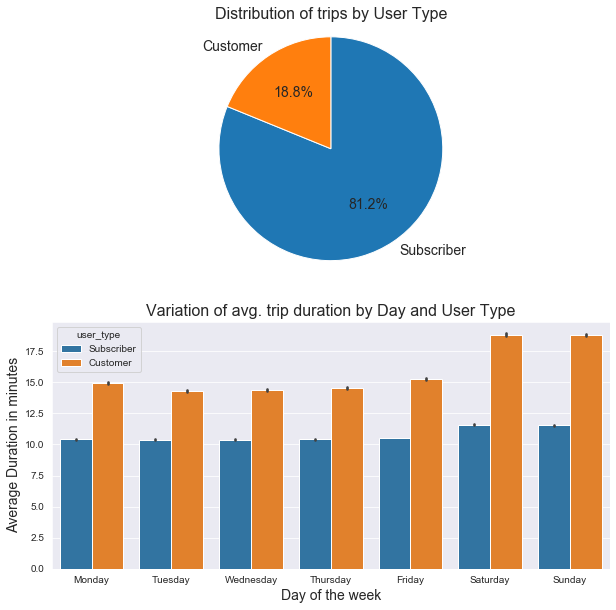

In [9]:
plt.figure(figsize=[10, 10]);
sb.set_style('darkgrid');

plt.subplot(2, 1, 1);
sorted_counts = dataset['user_type'].value_counts();
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,autopct='%1.1f%%',textprops={'fontsize': 14});
plt.axis('square');
plt.title('Distribution of trips by User Type',fontsize=16);

plt.subplot(2, 1, 2);
sb.barplot(x='trip_day',y='duration_minutes',hue='user_type',data=dataset,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']);
plt.xlabel('Day of the week',fontsize=14);
plt.ylabel('Average Duration in minutes',fontsize=14);
plt.title('Variation of avg. trip duration by Day and User Type',fontsize=16);

## Average trip duration for each User Type across all trips

>  The average trip duration is pretty constant for subscribers since the duration distribution is relatively narrower in the violin plot. They could be using the bikes for routine tasks. However, the customers could be using them on weekends for more leisure purposes because there is more variation in the trip duration and a longer tail which means more outliers.

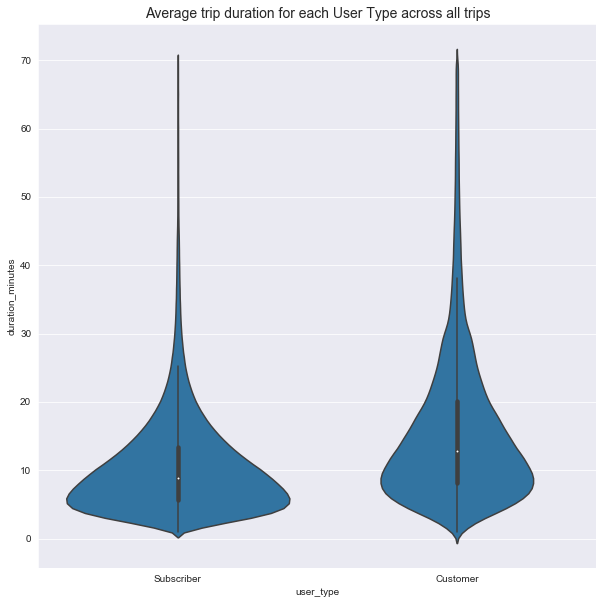

In [10]:
base_color = sb.color_palette()[0];
plt.figure(figsize=[10,10]);
sb.violinplot(data = dataset, x = 'user_type', y = 'duration_minutes', color = base_color,fontsize=12);
plt.title('Average trip duration for each User Type across all trips',fontsize=14);

## Trip Duration by the hour by User Type

>From the heatmap, it is evident that the Subscribers typically spend more duration in trips on a daily basis which is especially high between the hours 10 AM to 4 PM.

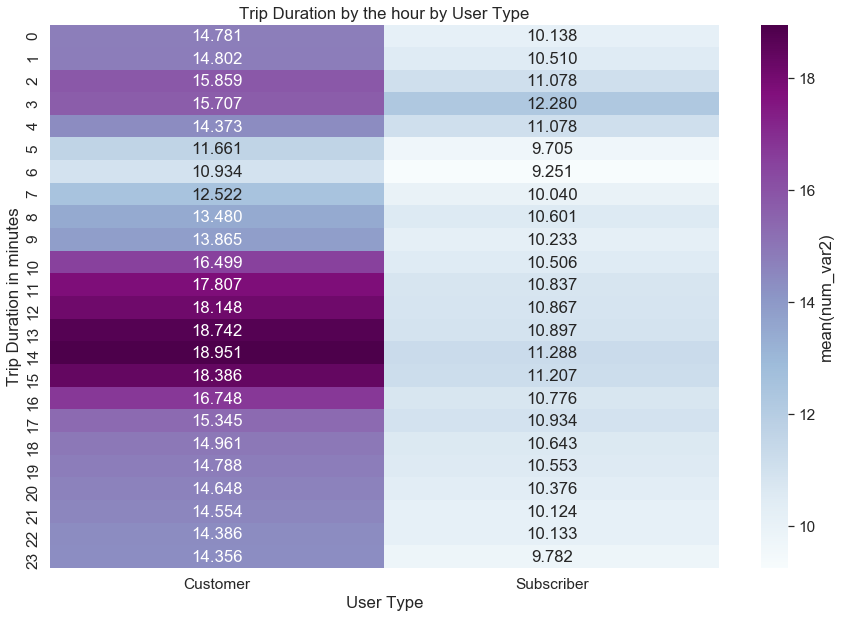

In [11]:
plt.figure(figsize=[15,10])
sb.set(font_scale=1.4)
cat_means = dataset.groupby(['user_type', 'trip_time']).mean()['duration_minutes']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'trip_time', columns = 'user_type', values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', cbar_kws = {'label' : 'mean(num_var2)'},cmap = 'BuPu');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in minutes');
plt.title('Trip Duration by the hour by User Type');

## Summary

>- There are 2 types of Users who are using the Baywheels Bikes. The Subscribers i.e. members comprise 81.2% of trip users while the remaining 18.8% are Customers or casual users. On a weekly basis, it looks like the Subscribers spend consistently the same amount of time in trips each day. However, the Customers have higher trip times on weekends. The Subscribers could be using the bikes for routine tasks whereas the Customers could be using them for leisure or sight seeing over the weekends causing a peak in the trip duration on weekends for Customers.<br>
- The outliers in trip duration for Customers are depicted by the longer tail of the violin plot for the total average trip time. On the other hand, the violin plot for Subscribers is narrow confirming the consistency in the trip durations as we suspected above.<br>
- However, it is interesting to see that although the Subscribers have consistent trip times on a daily basis, the trip duration on an hourly basis as such varies. From the above heatmap, it is evident that the Subscribers are spending more time on trips especially between 10AM and 4PM. The highest duration observed is almost 19 minutes whereas it is only about 12 minutes for Customers. The Customers seem to be having relatively lower trip times than Subscribers on any given day.